# Classification Exercises
<hr style="border:2px solid green"> </hr>

In [1]:
from pydataset import data
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

# Data Acquisition Exercises

### 4. Create a pandas dataframe, `df_iris`, from the `iris` data set.

In [2]:
df_iris = data('iris')

### print the first 3 rows


In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)


In [4]:
df_iris.shape

(150, 5)

### print the column names


In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### print the data type of each column


In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### print the summary statistics for each of the numeric variables. 


In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Would you recommend rescaling the data based on these statistics?

In [8]:
# will answer later, per Ravinder's instructions

### 5. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

In [9]:
# Get the link specifically from the webpage URL. For some reason getting the shareable link causes errors
# In addition, the sheet must be first made shareable to the public before copying the URL
google_sheets_url = 'https://docs.google.com/spreadsheets/d/1kQJZVGHpYa1CP_dHcCkOkSdy1F98z9v5/edit#gid=120278164'

# Turn that into a CSV export URL:
csv_export_url = google_sheets_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Pass it to pd.read_csv, which can indeed take a URL:
df_excel = pd.read_csv(csv_export_url)

# And now to test my dataframe!
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


### assign the first 100 rows to a new dataframe, `df_excel_sample`


In [10]:
df_excel_sample = df_excel.head(100)

### print the number of rows of your original dataframe


In [11]:
df_excel.shape[0]

7049

### print the first 5 column names


In [12]:
df_excel.columns[range(0,5)]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### print the column names that have a data type of object


In [13]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [14]:
df_excel.select_dtypes(['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

### compute the range for each of the numeric variables.

In [15]:
column_list = df_excel.select_dtypes(['int64','float64']).columns
column_list

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

In [16]:
for x in column_list:
    print(x,":", df_excel[ x ].max() - df_excel[ x ].min())

is_senior_citizen : 1
phone_service : 2
internet_service : 2
contract_type : 2
monthly_charges : 100.5
total_charges : 8666.0


### 6. Read the data from this google sheet into a dataframe, `df_google`

https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357

In [17]:
# Putting the linky as a variable
google_sheets_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

# Turn that into a CSV export URL:
csv_export_url = google_sheets_url.replace('/edit#gid=', '/export?format=csv&gid=')

# Pass it to pd.read_csv, which can indeed take a URL:
df_google = pd.read_csv(csv_export_url)

# And now to test my dataframe!
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### print the first 3 rows


In [18]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns


In [19]:
df_google.shape

(891, 12)

### print the column names


In [20]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### print the data type of each column


In [21]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### print the summary statistics for each of the numeric variables


In [22]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### print the unique values for each of your categorical variables

In [23]:
# Making a list of the columns I think are condisered "categorical"
categorical_columns = ["Sex", "Embarked", "Parch", "SibSp", "Pclass"]

# Making a simple loop to print all unique values ~
for x in categorical_columns:
    print(x, ":", df_google[x].unique())

Sex : ['male' 'female']
Embarked : ['S' 'C' 'Q' nan]
Parch : [0 1 2 5 3 4 6]
SibSp : [1 0 3 4 2 5 8]
Pclass : [3 1 2]


# Data Preparation Exercises

### Using the Iris Data:

### 1. Use the function defined in acquire.py to load the iris data.


In [24]:
iris = acquire.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### 2. Drop the species_id and measurement_id columns.



In [25]:
iris = iris.drop(["species_id","measurement_id"], 1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 3. Rename the species_name column to just species.

In [26]:
iris = iris.rename(columns={"species_name": "species"})
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 4. Create dummy variables of the species name and concatenate onto the iris dataframe.



In [27]:
# Creating my dummies
iris_dummy = pd.get_dummies(iris[['species']], dummy_na=False )

# Concatenating dummies onto dataframe and validating that columns are present
iris = pd.concat([iris, iris_dummy], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [28]:
def prep_iris(iris):
    iris = iris.drop(["species_id","measurement_id"], 1)
    iris = iris.rename(columns={"species_name": "species"})
    iris_dummy = pd.get_dummies(iris[['species']], dummy_na=False )
    iris = pd.concat([iris, iris_dummy], axis=1)
    return iris

### Using the Titanic dataset:

### 1. Use the function defined in acquire.py to load the Titanic data.



In [29]:
titanic = acquire.get_titanic_data()

### 2. Drop any unnecessary, unhelpful, or duplicated columns.



In [30]:
# Dropping duplicates (if any)
titanic = titanic.drop_duplicates()

# Dropping columns with too many missing values (like we saw in the lesson)
titanic = titanic.drop(['deck', 'embarked', 'class', 'age'], 1)

# embark_town has some NULLs, I'm gonna run .fillna() on the column with the most popular port
titanic['embark_town'] = titanic.embark_town.fillna(value='Southampton')


### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [31]:
# Making some dummies!
titanic_dummy = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na=False, drop_first= False )

# I only want one column for gender, but I want to keep all embark dummies for now
titanic_dummy = titanic_dummy.drop('sex_male', 1)
titanic_dummy = titanic_dummy.rename(columns={"sex_female": "is_female"})

# Okay, now to concatenate my dummy dataframe to my titanic dataframe
titanic = pd.concat([titanic, titanic_dummy], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,is_female,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,0,0,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,1,1,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,0,0,0,1


### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [32]:
def prep_titanic (titanic):
    # Dropping duplicates (if any)
    titanic = titanic.drop_duplicates()

    # Dropping columns with too many missing values (like we saw in the lesson)
    titanic = titanic.drop(['deck', 'embarked', 'class', 'age'], 1)

    # embark_town has some NULLs, I'm gonna run .fillna() on the column with the most popular port
    titanic['embark_town'] = titanic.embark_town.fillna(value='Southampton')

    # Making some dummies!
    titanic_dummy = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na=False, drop_first= False )

    # I only want one column for gender, but I want to keep all embark dummies for now
    titanic_dummy = titanic_dummy.drop('sex_male', 1)
    titanic_dummy = titanic_dummy.rename(columns={"sex_female": "is_female"})

    # Okay, now to concatenate my dummy dataframe to my titanic dataframe
    titanic = pd.concat([titanic, titanic_dummy], axis=1)
    
    return titanic

### Using the Telco dataset

### 1. Use the function defined in acquire.py to load the Telco data.



In [33]:
telco = acquire.get_telco_data()

### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [34]:
# Some total_charges are blank. Let's convert those to zero for now, or I won't be able to change dtype
telco = telco.assign(total_charges = telco.total_charges.replace(" ", "0.00"))

# Total_Charges needs to be changed from Object to a Float
telco["total_charges"]= telco["total_charges"].str.strip().replace(",","").replace("$","").astype(float)

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [35]:
# Always Drop them duplicates (if any)
telco = telco.drop_duplicates()

# Time to make a LOT of dummies for all the categorical columns
telco_dummy1 = pd.get_dummies(
                              telco[[ 'gender', 
                                      'partner', 
                                      'dependents', 
                                      'phone_service', 
                                      'paperless_billing',
                                      'churn',
                                      'multiple_lines', 
                                      'online_security', 
                                      'online_backup', 
                                      'device_protection', 
                                      'tech_support',
                                      'streaming_tv']], 
                                      dummy_na= False, drop_first= True
                             )
# Making two dummies because it's easier than dropping a bunch of columns after
telco_dummy2 = pd.get_dummies(
                              telco[[ 
                                      'internet_service_type',
                                      'payment_type',
                                      'contract_type']], 
                                      dummy_na= False, #drop_first= True
                             )

# Now to concatenate my dummy dataframes to my telco dataframe
telco = pd.concat([telco, telco_dummy1, telco_dummy2], axis=1)
telco.head()

# Looks great! I'm gonna rename some columns for clarity tho:
telco = telco.rename(columns={"gender_Male": "is_male"})
telco = telco.rename(columns={"partner_Yes": "has_partner"})
telco = telco.rename(columns={"dependents_Yes": "has_dependent"})
telco = telco.rename(columns={"phone_service_Yes": "has_phone_service"})
telco = telco.rename(columns={"paperless_billing_Yes": "has_paperless_billing"})
telco = telco.rename(columns={"churn_Yes": "has_churned"})
telco = telco.rename(columns={"contract_type_One year": "one_year_contract"})
telco = telco.rename(columns={"contract_type_Two year": "two_year_contract"})
telco = telco.rename(columns={"multiple_lines_Yes": "has_multiple_lines"})
telco = telco.rename(columns={"multiple_lines_No phone service": "multiple_lines_no_phone_service"})
telco = telco.rename(columns={"online_security_No internet service": "online_security_no_internet_service"})
telco = telco.rename(columns={"online_security_Yes": "has_online_security"})
telco = telco.rename(columns={"online_backup_No internet service": "online_backup_no_internet_service"})
telco = telco.rename(columns={"online_backup_Yes": "has_online_backup"})
telco = telco.rename(columns={"device_protection_No internet service": "device_protection_no_internet_service"})
telco = telco.rename(columns={"device_protection_Yes": "has_device_protection"})
telco = telco.rename(columns={"tech_support_No internet service": "tech_support_no_internet_service"})
telco = telco.rename(columns={"tech_support_Yes": "has_tech_support"})
telco = telco.rename(columns={"streaming_tv_No internet service": "streaming_tv_no_internet_service"})
telco = telco.rename(columns={"streaming_tv_Yes": "has_streaming_tv"})
telco = telco.rename(columns={"internet_service_type_Fiber optic": "internet_service_type_fiber_optic"})
telco = telco.rename(columns={"payment_type_Bank transfer (automatic)": "payment_type_bank_transfer"})
telco = telco.rename(columns={"payment_type_Credit card (automatic)": "payment_type_credit_card"})
telco = telco.rename(columns={"payment_type_Electronic check": "payment_type_electronic_check"})
telco = telco.rename(columns={"payment_type_Mailed check": "payment_type_mailed_check"})
telco = telco.rename(columns={"contract_type_Month-to-month": "month_to_month_contract"})



### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [36]:
def prep_telco(telco):
    
    # Some total_charges are blank. Let's convert those to zero for now, or I won't be able to change dtype
    telco = telco.assign(total_charges = telco.total_charges.replace(" ", "0.00"))

    # Total_Charges needs to be changed from Object to a Float
    telco["total_charges"]= telco["total_charges"].str.strip().replace(",","").replace("$","").astype(float)

    # Always Drop them duplicates (if any)
    telco = telco.drop_duplicates()

    # Time to make a LOT of dummies for all the categorical columns
    telco_dummy1 = pd.get_dummies(
                                  telco[[ 'gender', 
                                          'partner', 
                                          'dependents', 
                                          'phone_service', 
                                          'paperless_billing',
                                          'churn',
                                          'multiple_lines', 
                                          'online_security', 
                                          'online_backup', 
                                          'device_protection', 
                                          'tech_support',
                                          'streaming_tv']], 
                                          dummy_na= False, drop_first= True
                                 )
    # Making two dummies because it's easier than dropping a bunch of columns after
    telco_dummy2 = pd.get_dummies(
                                  telco[[ 
                                          'internet_service_type',
                                          'payment_type',
                                          'contract_type']], 
                                          dummy_na= False, #drop_first= True
                                 )

    # Now to concatenate my dummy dataframes to my telco dataframe
    telco = pd.concat([telco, telco_dummy1, telco_dummy2], axis=1)
    telco.head()

    # Looks great! I'm gonna rename some columns for clarity tho:
    telco = telco.rename(columns={"gender_Male": "is_male"})
    telco = telco.rename(columns={"partner_Yes": "has_partner"})
    telco = telco.rename(columns={"dependents_Yes": "has_dependent"})
    telco = telco.rename(columns={"phone_service_Yes": "has_phone_service"})
    telco = telco.rename(columns={"paperless_billing_Yes": "has_paperless_billing"})
    telco = telco.rename(columns={"churn_Yes": "has_churned"})
    telco = telco.rename(columns={"contract_type_One year": "one_year_contract"})
    telco = telco.rename(columns={"contract_type_Two year": "two_year_contract"})
    telco = telco.rename(columns={"multiple_lines_Yes": "has_multiple_lines"})
    telco = telco.rename(columns={"multiple_lines_No phone service": "multiple_lines_no_phone_service"})
    telco = telco.rename(columns={"online_security_No internet service": "online_security_no_internet_service"})
    telco = telco.rename(columns={"online_security_Yes": "has_online_security"})
    telco = telco.rename(columns={"online_backup_No internet service": "online_backup_no_internet_service"})
    telco = telco.rename(columns={"online_backup_Yes": "has_online_backup"})
    telco = telco.rename(columns={"device_protection_No internet service": "device_protection_no_internet_service"})
    telco = telco.rename(columns={"device_protection_Yes": "has_device_protection"})
    telco = telco.rename(columns={"tech_support_No internet service": "tech_support_no_internet_service"})
    telco = telco.rename(columns={"tech_support_Yes": "has_tech_support"})
    telco = telco.rename(columns={"streaming_tv_No internet service": "streaming_tv_no_internet_service"})
    telco = telco.rename(columns={"streaming_tv_Yes": "has_streaming_tv"})
    telco = telco.rename(columns={"internet_service_type_Fiber optic": "internet_service_type_fiber_optic"})
    telco = telco.rename(columns={"payment_type_Bank transfer (automatic)": "payment_type_bank_transfer"})
    telco = telco.rename(columns={"payment_type_Credit card (automatic)": "payment_type_credit_card"})
    telco = telco.rename(columns={"payment_type_Electronic check": "payment_type_electronic_check"})
    telco = telco.rename(columns={"payment_type_Mailed check": "payment_type_mailed_check"})
    telco = telco.rename(columns={"contract_type_Month-to-month": "month_to_month_contract"})

    return telco

In [37]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_male,has_partner,has_dependent,has_phone_service,has_paperless_billing,has_churned,multiple_lines_no_phone_service,has_multiple_lines,online_security_no_internet_service,has_online_security,online_backup_no_internet_service,has_online_backup,device_protection_no_internet_service,has_device_protection,tech_support_no_internet_service,has_tech_support,streaming_tv_no_internet_service,has_streaming_tv,internet_service_type_DSL,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer,payment_type_credit_card,payment_type_electronic_check,payment_type_mailed_check,month_to_month_contract,one_year_contract,two_year_contract
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1


# Exploratory Analysis Exercises Part I

### Section 1 - `iris_db`: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.



In [38]:
# All the work I've done in one pretty package:
# Note: See acquire.py for code
iris_train, iris_validate, iris_test = acquire.prep_iris( acquire.get_iris_data() )

### 2. Univariate Stats

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



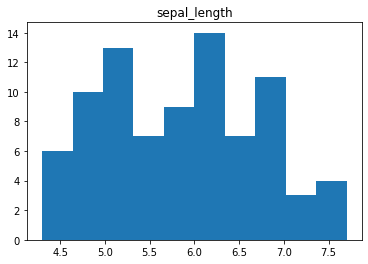

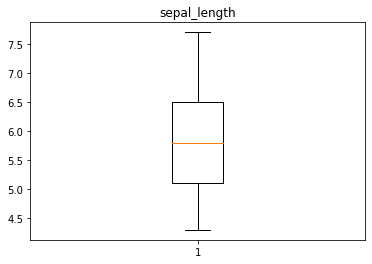

count    84.000000
mean      5.840476
std       0.859408
min       4.300000
25%       5.100000
50%       5.800000
75%       6.500000
max       7.700000
Name: sepal_length, dtype: float64


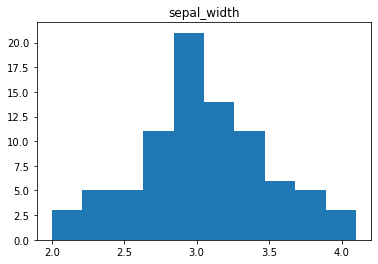

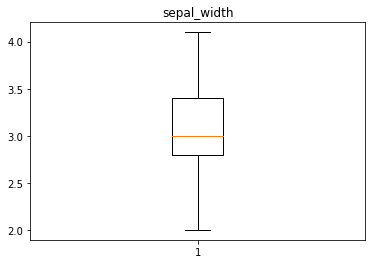

count    84.000000
mean      3.054762
std       0.434479
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.100000
Name: sepal_width, dtype: float64


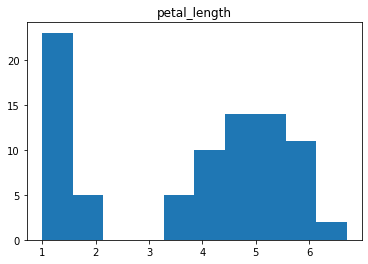

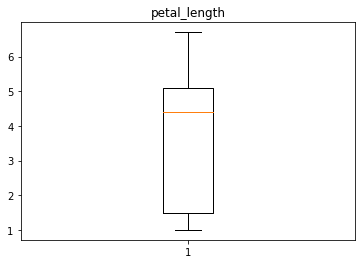

count    84.000000
mean      3.740476
std       1.763766
min       1.000000
25%       1.500000
50%       4.400000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64


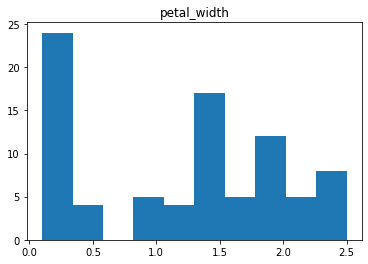

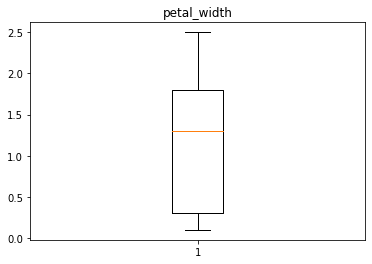

count    84.000000
mean      1.194048
std       0.773250
min       0.100000
25%       0.300000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [39]:
# I'm gonna make a loop for this so I don't have to write the same code 4 times.
# The measurements are all float data types, so I'll single them out this way
iris_measurements = iris_train.select_dtypes('float64').columns

# Here's the loop for Histograms, Boxplots, and Descriptive Stats
for x in iris_measurements:
    plt.hist(iris_train[ x ])
    plt.title( x )
    plt.show()
    plt.boxplot(iris_train[ x ])
    plt.title( x )
    plt.show()
    print(iris_train[ x ].describe())
    print("===========================================================")

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



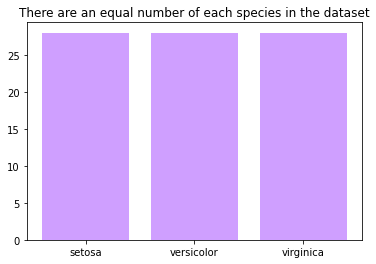

In [40]:
# Looking at the frequency of each species in the Train data set
species_frequency = iris_train.species.value_counts()

# Remeber that the 'species_frequency' variable is a 1-Dimensional Series
# This makes the species names the index, which I can access with .index()
# Anywho, here is the seemingly redundant frequency barplot. I have an equal number of each species.
plt.title( "There are an equal number of each species in the dataset" )
plt.bar(species_frequency.index, species_frequency, color = '#CF9FFF');

### Document takeaways & any actions.

- I have 84 flowers in my train data set
- `sepal_length` and `sepal_width` have normal distributions
- `petal_length` and `petal_width` seem to have divided histograms
- `petal length` has the largest standard deviation

# Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



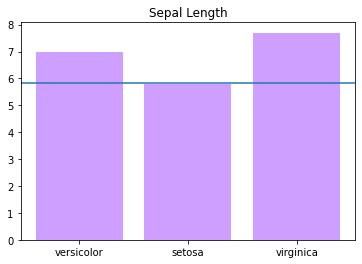

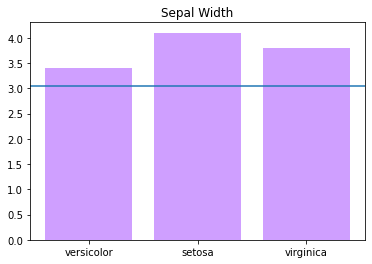

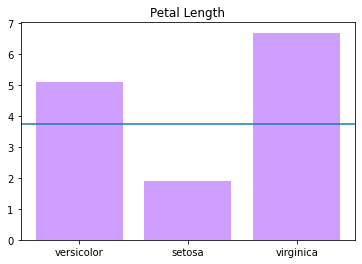

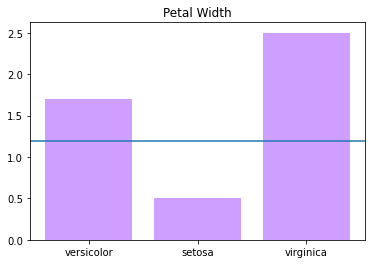

In [41]:
# Couldn't get the for loop to work, so to save time I'll just code all 4 charts this time
plt.title( "Sepal Length" )
plt.bar(iris_train.species, iris_train.sepal_length, color = '#CF9FFF');
plt.axhline(iris_train.sepal_length.mean())
plt.show()

plt.title( "Sepal Width" )
plt.bar(iris_train.species, iris_train.sepal_width, color = '#CF9FFF');
plt.axhline(iris_train.sepal_width.mean())
plt.show()

plt.title( "Petal Length" )
plt.bar(iris_train.species, iris_train.petal_length, color = '#CF9FFF');
plt.axhline(iris_train.petal_length.mean())
plt.show()

plt.title( "Petal Width" )
plt.bar(iris_train.species, iris_train.petal_width, color = '#CF9FFF');
plt.axhline(iris_train.petal_width.mean())
plt.show()

### For each measurement type, compute the descriptive statistics for each species.



In [42]:
species_name= ["virginica", "setosa", "versicolor"]

for name in species_name:
    for measure in iris_measurements:
        print( name, measure )
        print( iris_train[iris_train.species == name][measure].describe() )
        print("==========================")

virginica sepal_length
count    28.000000
mean      6.585714
std       0.655300
min       4.900000
25%       6.275000
50%       6.500000
75%       6.975000
max       7.700000
Name: sepal_length, dtype: float64
virginica sepal_width
count    28.000000
mean      2.985714
std       0.342879
min       2.200000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.800000
Name: sepal_width, dtype: float64
virginica petal_length
count    28.000000
mean      5.492857
std       0.544963
min       4.500000
25%       5.100000
50%       5.450000
75%       5.825000
max       6.700000
Name: petal_length, dtype: float64
virginica petal_width
count    28.000000
mean      2.039286
std       0.271265
min       1.500000
25%       1.800000
50%       2.000000
75%       2.300000
max       2.500000
Name: petal_width, dtype: float64
setosa sepal_length
count    28.000000
mean      4.953571
std       0.326011
min       4.300000
25%       4.700000
50%       4.950000
75%       5.125000
max       5

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


In [43]:
# Virginica petal_width.mean() vs Versicolor petal_width.mean()

# Okay, first I need to write down my hypothesis setup: 
# H0: Virginica petal_width is less than or equal to Versicolor petal_width
# Ha: Virginica petal_width is greater than Versicolor petal_width

null_hypothesis = "Virginica petal_width is less than or equal to Versicolor petal_width." 
alternative_hypothesis = "Virginica petal_width is greater than Versicolor petal_width."

# assuming alpha since it wasn't given...
alpha = .05

# Following the curriculumn, I need to subset the data into Virginica and Versicolor
virginica = iris_train[iris_train.species== "virginica"]
versicolor = iris_train[iris_train.species== "versicolor"]

# Now I need to check the variances of the two groups
virginica.petal_width.var(), versicolor.petal_width.var()

# Following the curriculumn....
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica petal_width is less than or equal to Versicolor petal_width.
We find evidence evidence to move forward with the understanding that Virginica petal_width is greater than Versicolor petal_width.


In [44]:
# Alright, now to copy/paste for the next 3 measurements!
# Virginica petal_length.mean() vs Versicolor petal_length.mean()

# Okay, first I need to write down my hypothesis setup: 
# H0: Virginica petal_length is less than or equal to Versicolor petal_length
# Ha: Virginica petal_length is greater than Versicolor petal_length

null_hypothesis = "Virginica petal_length is less than or equal to Versicolor petal_length." 
alternative_hypothesis = "Virginica petal_length is greater than Versicolor petal_length."

# assuming alpha since it wasn't given...
alpha = .05

# Following the curriculumn, I need to subset the data into Virginica and Versicolor
virginica = iris_train[iris_train.species== "virginica"]
versicolor = iris_train[iris_train.species== "versicolor"]

# Now I need to check the variances of the two groups
virginica.petal_length.var(), versicolor.petal_length.var()

# Following the curriculumn....
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length, alternative="greater")

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica petal_length is less than or equal to Versicolor petal_length.
We find evidence evidence to move forward with the understanding that Virginica petal_length is greater than Versicolor petal_length.


In [45]:
# Alright, now to copy/paste for the next 3 measurements!
# Virginica sepal_length.mean() vs Versicolor sepal_length.mean()

# Okay, first I need to write down my hypothesis setup: 
# H0: Virginica sepal_length is less than or equal to Versicolor sepal_length
# Ha: Virginica sepal_length is greater than Versicolor sepal_length

null_hypothesis = "Virginica sepal_length is less than or equal to Versicolor sepal_length." 
alternative_hypothesis = "Virginica sepal_length is greater than Versicolor sepal_length."

# assuming alpha since it wasn't given...
alpha = .05

# Following the curriculumn, I need to subset the data into Virginica and Versicolor
virginica = iris_train[iris_train.species== "virginica"]
versicolor = iris_train[iris_train.species== "versicolor"]

# Now I need to check the variances of the two groups
virginica.sepal_length.var(), versicolor.sepal_length.var()

# Following the curriculumn....
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.sepal_length, versicolor.sepal_length, alternative="greater")

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica sepal_length is less than or equal to Versicolor sepal_length.
We find evidence evidence to move forward with the understanding that Virginica sepal_length is greater than Versicolor sepal_length.


In [46]:
# Virginica sepal_width.mean() vs Versicolor sepal_width.mean()

# Okay, first I need to write down my hypothesis setup: 
# H0: Virginica sepal_width is less than or equal to Versicolor sepal_width
# Ha: Virginica sepal_width is greater than Versicolor sepal_width

null_hypothesis = "Virginica sepal_width is less than or equal to Versicolor sepal_width." 
alternative_hypothesis = "Virginica sepal_width is greater than Versicolor sepal_width."

# assuming alpha since it wasn't given...
alpha = .05

# Following the curriculumn, I need to subset the data into Virginica and Versicolor
virginica = iris_train[iris_train.species== "virginica"]
versicolor = iris_train[iris_train.species== "versicolor"]

# Now I need to check the variances of the two groups
virginica.sepal_width.var(), versicolor.sepal_width.var()

# Following the curriculumn....
# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width, alternative="greater")

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica sepal_width is less than or equal to Versicolor sepal_width.
We find evidence evidence to move forward with the understanding that Virginica sepal_width is greater than Versicolor sepal_width.


### Document takeaways & any actions.

- Virginica in general, has larger measurements than Versicolor, both in petals and sepals
- Setosa has the smallest petals
- Petal length & width are consistent with each of the three species

# Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



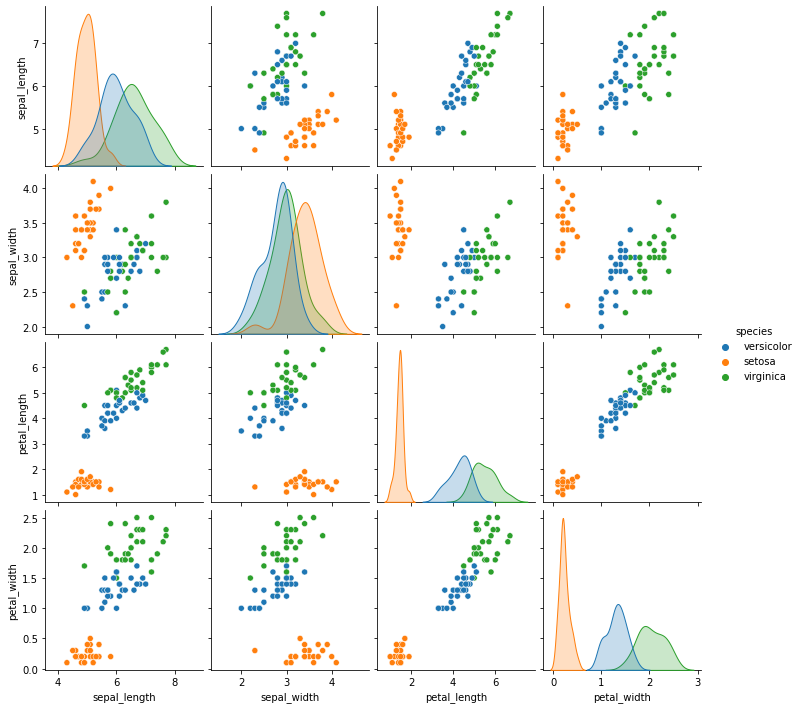

In [47]:
sns.pairplot(iris_train, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"], hue= "species");

### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col



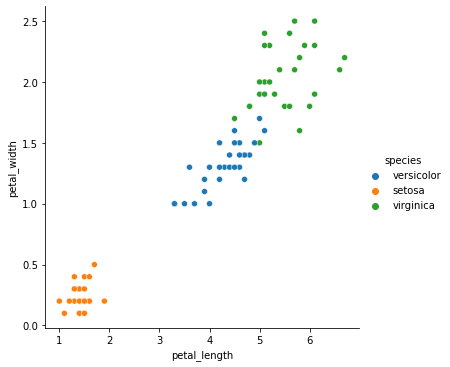

In [48]:
# sns.relplot(data = tips, x = "total_bill", y = "tip");
sns.relplot(data = iris_train, x= "petal_length", y="petal_width", hue="species");

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



In [49]:
# Ravinder told us to skip this because we have not done the "tidy data" lesson yet

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).


In [50]:
# Virginica has bigger individual measurements, but does it have bigger area?
# The pairplot shows a lot of overlap for sepal area between Virginica and Versicolor
# Does Virginica have greater sepal area than Versicolor?

# Virginica sepal area vs Versicolor sepal area

# Okay, first I need to write down my hypothesis setup: 
# H0: Virginica sepal area is less than or equal to Versicolor sepal area
# Ha: Virginica sepal area is greater than Versicolor sepal area

null_hypothesis = "Virginica sepal area is less than or equal to Versicolor sepal area." 
alternative_hypothesis = "Virginica sepal area is greater than Versicolor sepal area."
alpha = .05


# I need to subset the data into Virginica and Versicolor
virginica = iris_train[iris_train.species== "virginica"]
versicolor = iris_train[iris_train.species== "versicolor"]

# Now I need to check the variances of the two groups
virginica.sepal_width.var(), versicolor.sepal_width.var()

# Using the Mann Whitney u-test
t, p = stats.mannwhitneyu( (virginica.sepal_width * virginica.sepal_length), (versicolor.sepal_width * versicolor.sepal_length), alternative="greater")

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understanding that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica sepal area is less than or equal to Versicolor sepal area.
We find evidence evidence to move forward with the understanding that Virginica sepal area is greater than Versicolor sepal area.



### Document takeaways and any actions.

- Setosa measurements are distinct from Viginica or Versicolor
- Virginica has greater sepal area than Versicolor as well, which makes sense since most measurements are bigger
- Petal measurements look more definitive than sepal measurements.
- If I was going to use a unit of measure to categorize the species of this set, it would be petal area.


- For ease of future analysis, I should probably add a column for sepal area and petal area. 

# Exploratory Analysis Exercises Part II
### Explore your titanic dataset more completely...
### Determine drivers of the target variable


### Determine if certain columns should be dropped



### Determine if it would be valuable to bin some numeric columns


### Determine if it would be valuable to combine multiple columns into one.


### Does it make sense to combine any features?


### Do you find any surprises?


### Document any and all findings and takeaways in your notebook using markdown.


# Tidy Data Exercises
### 1. Attendance Data

### Load the "attendance.csv" file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [51]:
# First to read the file:
attendance = pd.read_csv('attendance.csv')
# What I understand from this data...
# T means Tardy = 1 - .10 = .90 or 90% attendance
# P means Present = 100% attendance
# H means Half day= 50% attendance
# A means Absent = 0% attendance

# Now to make some nachos (melt it!)
attendance = attendance.melt(id_vars=['Unnamed: 0'], var_name='Date', value_name='Attendance')

# Sorting it by student name because it's easier for me to read
# P.S. I know i could probably rename the student name column, but I didn't find it entirely necessary 
attendance = attendance.sort_values("Unnamed: 0")

# Adding a column to represent the percentage of the day attended
attendance["Attendance Percentage"] = attendance.Attendance.str.replace("H",'0.5').str.replace("P",'1.0').str.replace("T",'.90').str.replace("A",'0').astype(float)

# And now to add the pretty bow of 'groupby' to see each students total attendance
attendance.groupby("Unnamed: 0").mean()


,Attendance Percentage
Unnamed: 0,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


### 2. Coffee Levels

### 2a. Read the "coffee_levels.csv" file. 


In [52]:
# Coffee coffee coffee!
coffee = pd.read_csv('coffee_levels.csv')
coffee

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


### 2b. Transform the data so that each carafe is in it's own column. 


In [54]:
# Using the curriculum to my advantage...
coffee = coffee.set_index(['hour', 'coffee_carafe']).unstack(level=1)
coffee.columns = coffee.columns.droplevel()
coffee.columns.name = ''

coffee

,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


### 2c. Is this the best shape for the data?

Maybe not the best, but it's significantly easier to read and compare which coffee_carafe is doing best at each hour.

### 3. Cake Recipes

### 3a. Read the "cake_recipes.csv" data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.


In [55]:
cake_tastiness_scores = pd.read_csv('cake_recipes.csv')
cake_tastiness_scores

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


### 3b. Tidy the data as necessary.


In [56]:
# Okay, ignoring the two-variable column for the moment 'recipe:position'
# Melting the oven temperatures
cake_melt = cake_tastiness_scores.melt(id_vars='recipe:position', var_name='oven_temp')
cake_melt.head()

,recipe:position,oven_temp,value
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207


In [59]:
# Now to tackle the double variable column and split it into two different columns:
cake_tastiness_scores = cake_melt["recipe:position"].str.split(':', expand=True)
cake_tastiness_scores.columns = ['recipe', 'position']
cake_tastiness_scores.head()

,recipe,position
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom


In [60]:
# Combining the new columns with the melted oven_temp columns:
cake_tastiness_scores = pd.concat([cake_tastiness_scores, cake_melt], axis=1).drop(columns='recipe:position')
cake_tastiness_scores.head()

,recipe,position,oven_temp,value
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


### 3c. Which recipe, on average, is the best? recipe b


In [61]:
# Recipe B had the best taste score on average
cake_tastiness_scores.groupby("recipe").mean()

,value
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


### 3d. Which oven temperature, on average, produces the best results? 275


In [62]:
# An oven temperature of 275 produced the best taste scores
cake_tastiness_scores.groupby("oven_temp").mean()

,value
oven_temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


### 3e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [71]:
# Alright then, now to find a pivot table that helps. I'm gonna try grouping by recipe and then oven temperature
cake_pivot= cake_tastiness_scores.pivot_table(index= ['recipe','oven_temp'], columns="position", values="value")
cake_pivot

position             bottom        top
recipe oven_temp                      
a      225        61.738655  51.709751
       250        53.912627  52.009735
       275        74.414730  68.576858
       300        98.786784  50.228470
b      225        57.095320  82.455004
       250        61.904369  95.224151
       275        61.196980  98.594881
       300        99.248541  58.169349
c      225        96.470207  71.306308
       250        52.001358  82.795477
       275        92.893227  92.098049
       300        65.473084  53.960273
d      225        52.799753  96.873178
       250        58.670419  76.101363
       275        51.747686  59.571620
       300        56.183110  50.971626

In [101]:
# My answer as a pretty printed sentence.
print("Recipe",cake_pivot.idxmax()[0][0], "with and oven temp of",cake_pivot.idxmax()[0][1],'degrees and placed on the',cake_pivot.idxmax().index[0], 'rack, had the highest combined taste of score of', round(cake_pivot.max()[0]),"%" )
#cake_pivot[cake_pivot == cake_pivot.max()]

Recipe b with and oven temp of 300 degrees and placed on the bottom rack, had the highest combined taste of score of 99 %
